# GDA for CIFAR-10

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'


# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


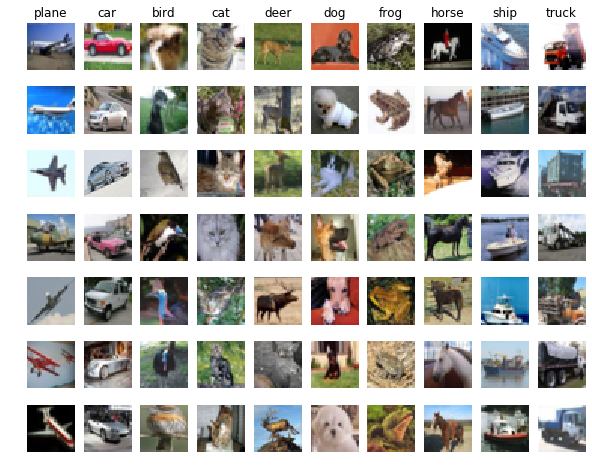

Training data shape: 49000,3072
Validation data shape: 1000,3072
Test data shape: 10000,3072
Training data shape with bias term: 49000,3073
Validation data shape with bias term: 1000,3073
Test data shape with bias term: 10000,3073


In [49]:
import utils

# Get the CIFAR-10 data broken up into train, validation and test sets

X_train, y_train, X_val, y_val, X_test, y_test = utils.get_CIFAR10_data()

# Build GDA model with X_train and y_train

In [50]:
# your code here (LDA model with same covariance for every class)


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=8, store_covariance=True)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)




C:\conda\envs\tfdeeplearning\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


# Test model on X_test and y_test
- print accuracy of model
- print confusion_matrix

In [51]:
#your code here
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=8, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

C:\conda\envs\tfdeeplearning\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[396  51  56  36  26  43  32  65 207  88]
 [ 67 418  35  42  35  28  59  47  80 189]
 [ 80  34 245  75 109 111 157  94  63  32]
 [ 39  45 117 165  73 230 167  70  39  55]
 [ 42  28 165  60 242 100 173 131  28  31]
 [ 34  31 122 143  78 294 129  97  46  26]
 [ 12  32 112 110 108  80 452  52  12  30]
 [ 37  44  81  54  76  89  60 425  50  84]
 [134  77  27  22  15  66  20  19 507 113]
 [ 67 187  31  21  28  22  58  67  94 425]]
Accuracy0.3569


# Visualize the means for all 10 classes

[[ 0.          0.19515809  0.34627443 ...  0.05073246  0.16336275
   0.35457057]
 [ 0.          0.08382813  0.03124521 ...  0.10626809  0.08830734
   0.18516497]
 [ 0.         -0.07563947 -0.06708527 ... -0.02323531  0.00151836
  -0.11401973]
 ...
 [ 0.          0.05690619  0.07269215 ...  0.2116618   0.14695101
  -0.0885355 ]
 [ 0.          0.21324967  0.36758111 ... -0.46199837 -0.25447271
   0.05445433]
 [ 0.          0.49713733  0.56543293 ...  0.19754381  0.15806545
   0.21131211]]


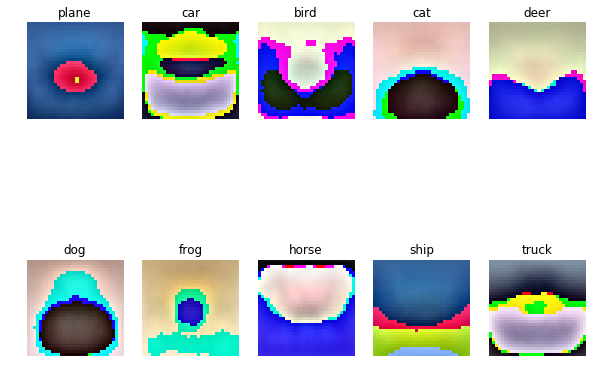

In [63]:
# your code here
print(lda.means_)


classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
    theta = lda.means_[i,1:]
    theta = theta.reshape(32, 32, 3)
    plt.subplot(2, 5, i + 1)

    # Rescale the weights to be between 0 and 255
    thetaimg = 255.0 * theta
    plt.imshow(thetaimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])

plt.show()

# Visualize the covariance matrix

(3073, 3073)


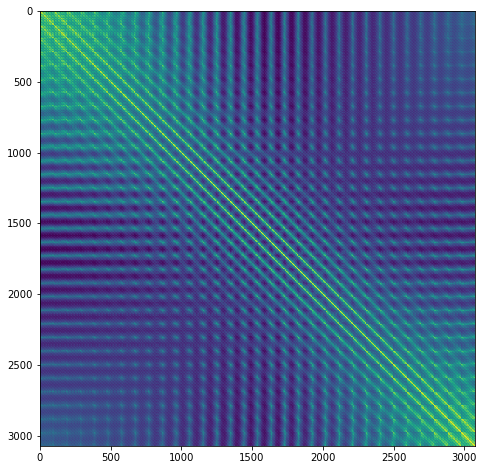

In [59]:
# your code here
print(lda.covariance_.shape)
plt.imshow(lda.covariance_)